### PCA Clustering Assignment

In [1]:
#import all libraries

import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale

from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Let's read the dataset first
dat = pd.read_csv("Country-data.csv")
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
dat.shape

(167, 10)

In [6]:
# Checking the percentage 
round(100*(dat.isnull().sum()/len(dat.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#Converting exports,imports and health spending percentages to absolute values.
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

In [9]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA

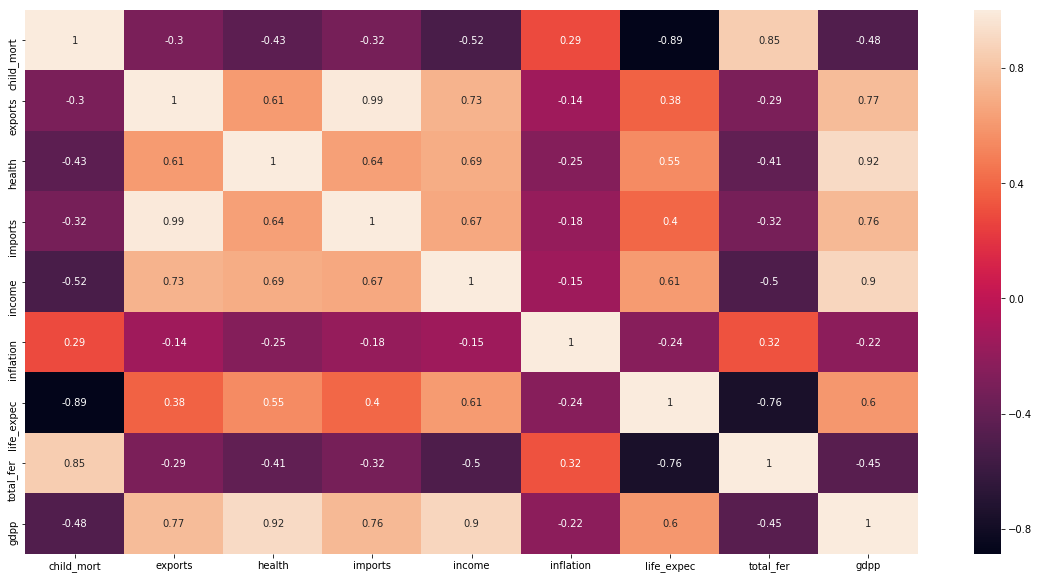

In [10]:
plt.figure(figsize = (20,10))        
sns.heatmap(dat.corr(),annot = True)

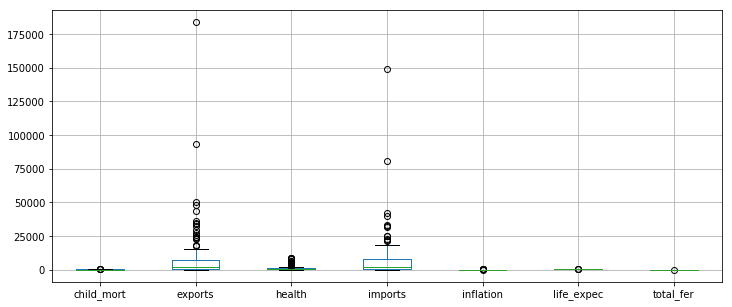

In [11]:
plt.figure(figsize=(12,5))
boxplot = dat.boxplot(column=['child_mort', 'exports', 'health', 'imports',
       'inflation', 'life_expec', 'total_fer'])

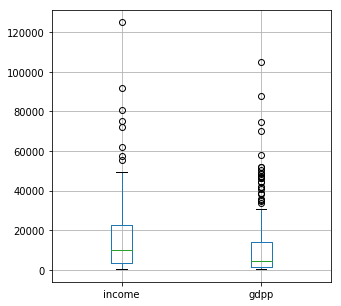

In [12]:
plt.figure(figsize=(5,5))
boxplot = dat.boxplot(column=['income', 'gdpp'])

### PCA on the data

In [13]:
#Normalising continuous Features 
dat1=dat[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [14]:
daty=dat['country']

In [15]:
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [16]:
dat1.shape

(167, 9)

In [17]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat1)

In [18]:
dat2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [19]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [20]:
#Performing the PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [22]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

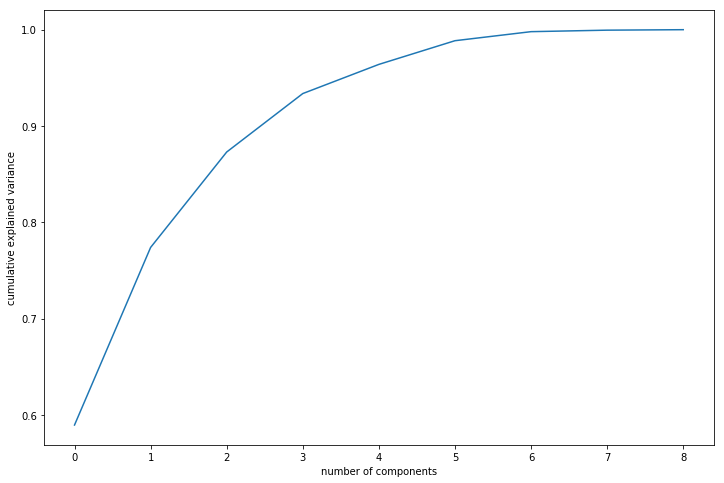

In [23]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 90% of the information is being explained by 3 components

In [24]:
#Understanding how the original variables are loaded on the principal components. It can be verified from above as well.
colnames = list(dat1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


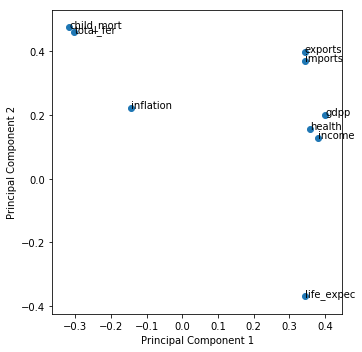

In [25]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [26]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [27]:
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(167, 3)

In [28]:
df_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [29]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [30]:
#Let's create the newer matrix according to the given principal components
cnames = list(daty)

In [31]:
pcs_df2 = pd.DataFrame({'country':cnames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [32]:
pcs_df2.shape

(167, 4)

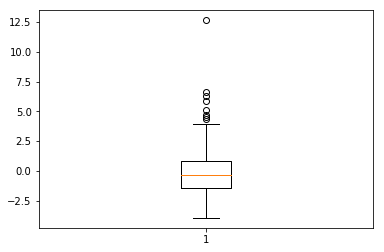

In [33]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

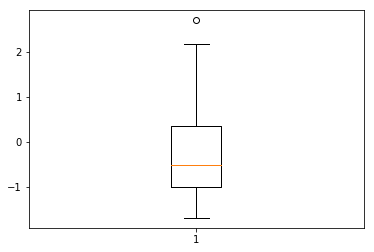

In [34]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

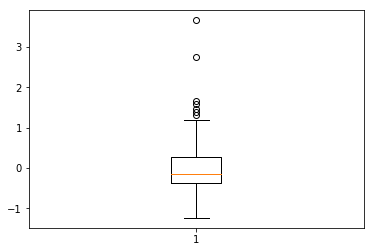

In [35]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

In [36]:
pcs_df2.shape

(119, 4)

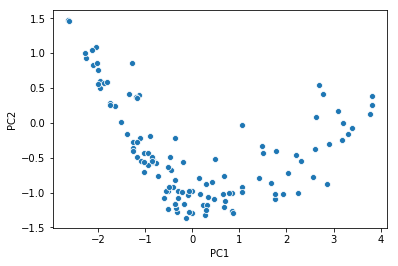

In [37]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

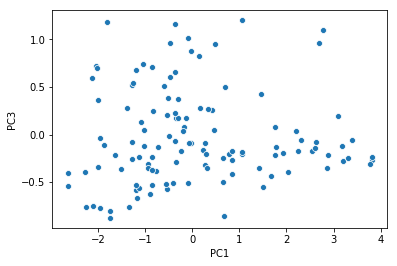

In [38]:
sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)

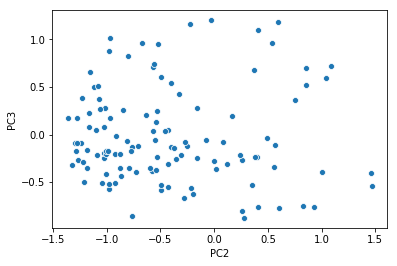

In [39]:
sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)

From the above plots we can see so clusters are good and some are bad .The good visulisation is seen in pc1,pc2

## Clustering 

In [40]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
pcs_df2_1=pcs_df2.drop(['country'],axis=1)

In [42]:
#Let's check the Hopkins measure
hopkins(pcs_df2_1)

0.7544244545151512

In [43]:
dat3_1 =pcs_df2_1

### K- means Clustering

In [44]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

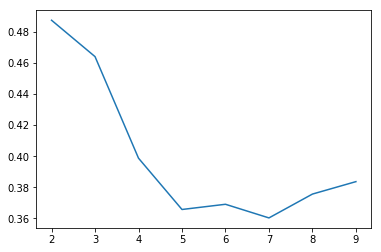

In [45]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

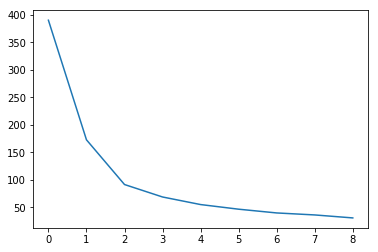

In [46]:
#Elbow curve 
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd) 

In [47]:
#Let's perform K means using K=3 we can choose any value of k like 2,3,4,5; but choose less than 5
model_clus2 = KMeans(n_clusters =3 , max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [48]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['country','PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,0


In [49]:
dat_km['ClusterID'].value_counts()

1    61
2    31
0    27
Name: ClusterID, dtype: int64

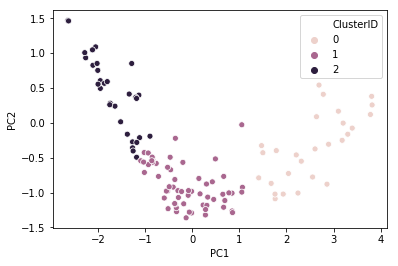

In [50]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

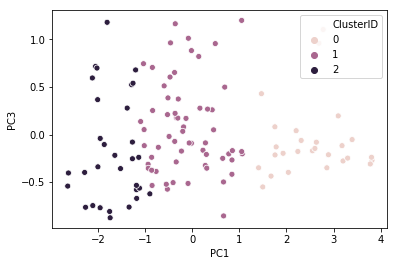

In [51]:
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=dat_km)

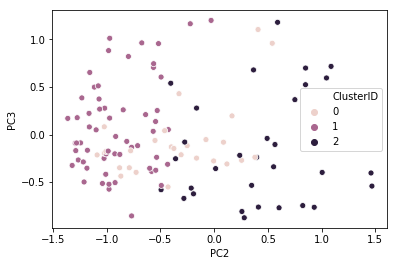

In [52]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=dat_km)

In [53]:
#merge the original dataset with the clusters. 
dat5=pd.merge(dat,dat_km,on='country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,0


In [54]:
dat_km.shape

(119, 5)

In [55]:
dat5.shape

(119, 14)

In [56]:
dat6=dat5.drop(['PC1','PC2','PC3'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0


In [57]:
dat6['ClusterID'].value_counts()

1    61
2    31
0    27
Name: ClusterID, dtype: int64

In [58]:
dat6[dat6['ClusterID']==0].country.values

array(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Canada', 'Cyprus',
       'Czech Republic', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Malta',
       'New Zealand', 'Portugal', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [59]:
dat6[dat6['ClusterID']==1].country.values

array(['Algeria', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Libya', 'Lithuania', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Morocco', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Seychelles', 'St. Vincent and the Grenadines',
       'Suriname', 'Tonga', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay',
       'Uzbekistan', 'Vietnam'], dtype=object)

In [60]:
dat6[dat6['ClusterID']==2].country.values

array(['Afghanistan', 'Botswana', 'Cambodia', 'Comoros', 'Congo, Rep.',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'India', 'Iraq', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan',
       'Rwanda', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Turkmenistan', 'Uganda', 'Vanuatu', 'Yemen'],
      dtype=object)

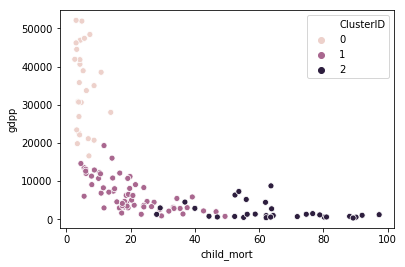

In [61]:
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',data=dat6)

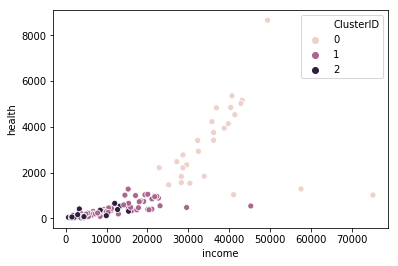

In [62]:
sns.scatterplot(x='income',y='health',hue='ClusterID',data=dat6)

#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of Clusters

In [63]:
clu_chilmort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health= 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports= 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation= 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_lifeexp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_totalfer= 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [64]:
df = pd.concat([pd.Series([0,1,2]),clu_chilmort,clu_exports,clu_health,clu_imports,clu_income,
               clu_inflation,clu_lifeexp,clu_totalfer,clu_gdpp], axis=1)
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.322222,14504.025926,3249.133704,13650.455556,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,1,20.221311,3071.619836,406.979256,3160.474656,12796.557377,6.627721,73.208197,2.272295,6636.360656
2,2,63.651613,861.023623,128.778690,858.977519,4450.000000,9.736452,63.329032,4.111935,2072.161290


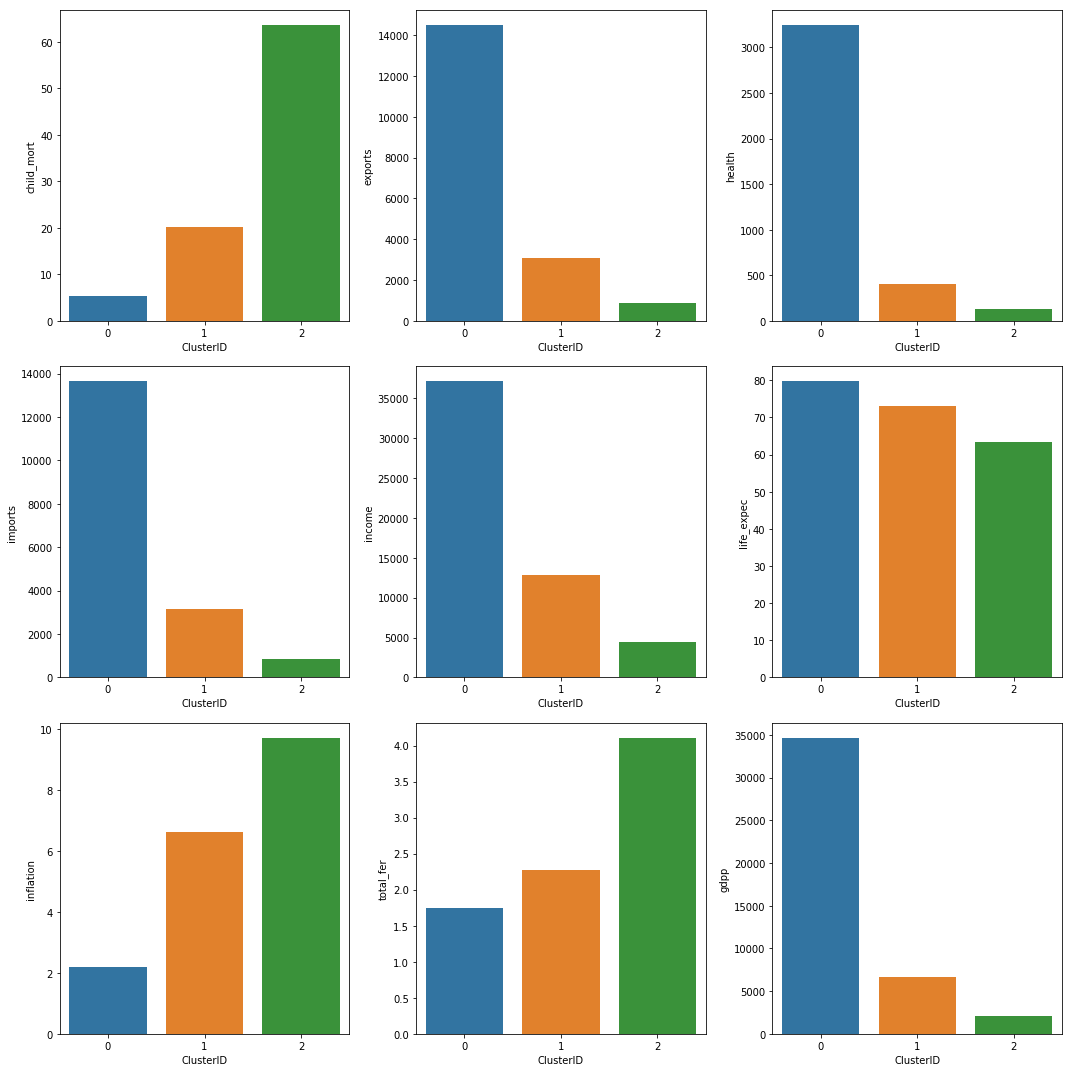

In [65]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp, ax = axs[2,2])
plt.tight_layout()

In [66]:
#Let's use the concept of binning
fin=dat[dat['child_mort']>63.651613]
fin=fin[fin['gdpp']<=2072.16]
fin.sort_values(['child_mort','gdpp'],ascending=[0,0]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708


## Hierarchical Clustering

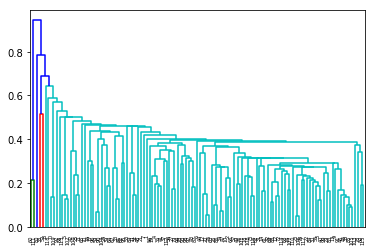

In [67]:
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

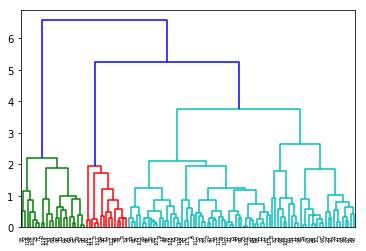

In [68]:
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [69]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters =3).reshape(-1,))
hc = pd.concat([pcs_df2, clusterCut], axis=1)
hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,2


In [70]:
hc.shape

(119, 5)

In [71]:
hc['ClusterID'].value_counts()

1    81
0    23
2    15
Name: ClusterID, dtype: int64

In [72]:
mhc1=pd.merge(dat,hc,on='country')
mhc=mhc1[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
mhc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


In [73]:
mhc['ClusterID'].value_counts()

1    81
0    23
2    15
Name: ClusterID, dtype: int64

In [74]:
mhc[mhc.ClusterID == 0].country.values[0:10]

array(['Afghanistan', 'Botswana', 'Comoros', 'Congo, Rep.', 'Eritrea',
       'Gabon', 'Gambia', 'Ghana', 'Iraq', 'Kenya'], dtype=object)

In [75]:
mhc[mhc.ClusterID==1].country.values

array(['Algeria', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Libya', 'Lithuania', 'Malaysia', 'Maldives',
       'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Morocco',
       'Myanmar', 'Nepal', 'New Zealand', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Samoa', 'Seychelles', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', 'Tonga',

In [76]:
mhc[mhc.ClusterID==2].country.values[ :5]

array(['Australia', 'Austria', 'Canada', 'Finland', 'France'],
      dtype=object)

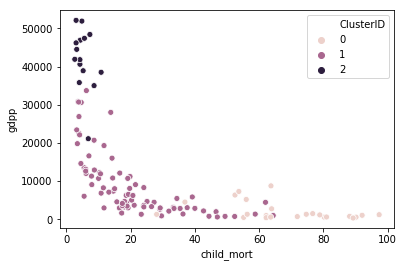

In [77]:
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',data=mhc)

## Analysis of Clusters

In [78]:
hc_chilmort = 	pd.DataFrame(mhc.groupby(["ClusterID"]).child_mort.mean())
hc_exports= 	pd.DataFrame(mhc.groupby(["ClusterID"]).exports.mean())
hc_health= 	pd.DataFrame(mhc.groupby(["ClusterID"]).health.mean())
hc_imports= 	pd.DataFrame(mhc.groupby(["ClusterID"]).imports.mean())
hc_income = 	pd.DataFrame(mhc.groupby(["ClusterID"]).income.mean())
hc_inflation= 	pd.DataFrame(mhc.groupby(["ClusterID"]).inflation.mean())
hc_lifeexp= 	pd.DataFrame(mhc.groupby(["ClusterID"]).life_expec.mean())
hc_totalfer= 	pd.DataFrame(mhc.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp= 	pd.DataFrame(mhc.groupby(["ClusterID"]).gdpp.mean())

In [79]:
hc_df = pd.concat([pd.Series([0,1,2]),hc_chilmort,hc_exports,hc_health,hc_imports,hc_income,
               hc_inflation,hc_lifeexp,hc_totalfer,hc_gdpp], axis=1)
hc_df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
hc_df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,68.478261,884.774513,135.873852,838.634174,4650.869565,10.711304,62.169565,4.507391,2152.739130
1,1,20.960494,4030.595414,635.004141,4139.667544,14473.703704,5.889160,73.403704,2.259630,8954.839506
2,2,5.173333,17256.080000,4132.270000,15558.526667,42853.333333,2.817467,80.486667,1.774000,42066.666667


bins

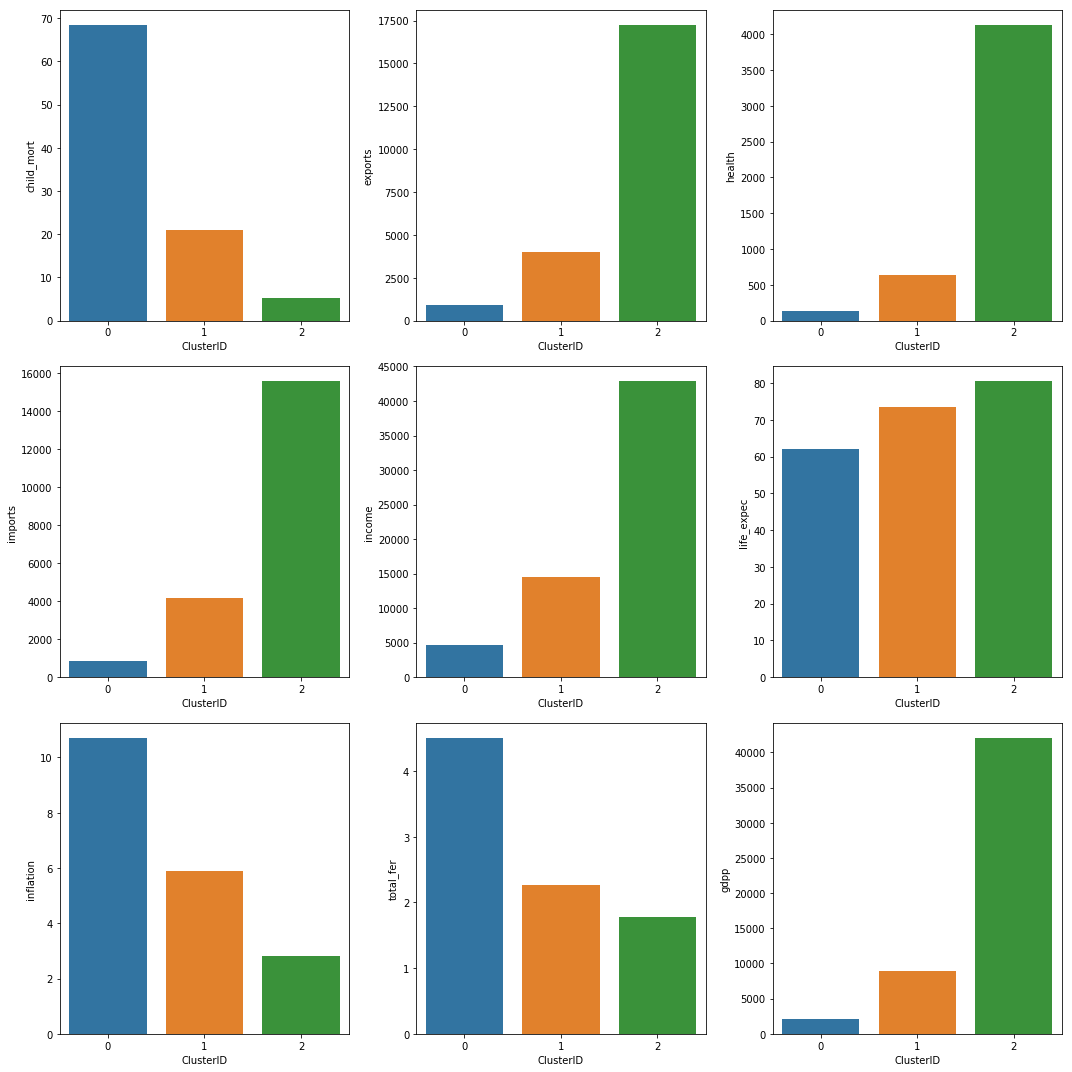

In [80]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=hc_df.ClusterID, y=hc_df.child_mort, ax = axs[0,0])
sns.barplot(x=hc_df.ClusterID, y=hc_df.exports, ax = axs[0,1])
sns.barplot(x=hc_df.ClusterID, y=hc_df.health, ax = axs[0,2])
sns.barplot(x=hc_df.ClusterID, y=hc_df.imports, ax = axs[1,0])
sns.barplot(x=hc_df.ClusterID, y=hc_df.income, ax = axs[1,1])
sns.barplot(x=hc_df.ClusterID, y=hc_df.life_expec, ax = axs[1,2])
sns.barplot(x=hc_df.ClusterID, y=hc_df.inflation, ax = axs[2,0])
sns.barplot(x=hc_df.ClusterID, y=hc_df.total_fer, ax = axs[2,1])
sns.barplot(x=hc_df.ClusterID, y=hc_df.gdpp, ax = axs[2,2])
plt.tight_layout()

In [88]:
#Let's use the concept of binning
fin_hc=dat[dat['child_mort']>68.47 ]
fin_hc1=fin_hc[fin_hc['gdpp']<=2152.7]
fundneed=fin_hc1.sort_values(['child_mort', 'gdpp'], ascending=[0, 0])
fundneed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


In [89]:
fundneed.country.values

array(['Haiti', 'Sierra Leone', 'Chad', 'Central African Republic',
       'Mali', 'Niger', 'Burkina Faso', 'Congo, Dem. Rep.',
       'Guinea-Bissau', "Cote d'Ivoire", 'Benin', 'Guinea', 'Cameroon',
       'Mozambique', 'Lesotho', 'Mauritania', 'Burundi', 'Pakistan',
       'Malawi', 'Togo', 'Afghanistan', 'Liberia', 'Comoros', 'Zambia',
       'Uganda', 'Gambia', 'Lao', 'Sudan', 'Ghana', 'Tanzania'],
      dtype=object)

the list of contries the are common in both type of clusterings are same, but the top 5 choosen on the variables child_mort and gdpp are 
Haiti,
sierra Leona
chad
Central African Republic
Mali

In [82]:
#dat.to_excel('dat1.xlsx', engine='xlsxwriter') 